# Assignment 1: Economic Conditions and its Impact on Independent Vote Share

For my research question I wanted to look at the impact of various economic conditions (independent variables) and their effect on the vote share for independent parties (grouped as one entity, despite disparate beliefs) across the different counties in the United States. The explanatory variables include median household income (I did not choose average household income, as outliers can have skew the results), unemployment rate, and education rate (percentage of adult population in the county who have a bachelor's degree or more in 2007-2011). The original dependent variable is the share of votes for the Libertarian party in a county. However, upon further review, I have instead changed the outcome to be the vote share for all independent parties within a county. This decision was made as the Libertarian party, despite being the most popular independent party, was far too marginal, thus to correct for this we will look at the combined vote share for all independent parties. Even with this, we still see that independent parties (combined) rarely win in many counties. Despite this, I maintain that it is an interesting topic, as it is important to determine why individuals within the US may be dissatisfied with the mainstream political parties, and is far less studied than the outcomes for the 2016 election for Democrats and Republicans.

I chose my explanatory variables as I thought that they were all relevant in determining how well-off a county is, with the median household income and unemployment rate being indicative of the material conditions of a county (high median household income and low unemployment rate suggesting a well-off community). Additionally, the inclusion of deaths from shooting was included ~ with the idea that more violence in a community might prompt people to support the idea of community militias suggested by the Libertarian party. However, upon further review, I have opted to remove the 'gun deaths' as an explanatory variable as there was too little variation (only several significant outliers), and also because we are looking at independent parties, that all hold very different stances on gun ownership. Instead, I have replaced the deaths caused by shootings by county with the education rate by county, however we must keep in mind that the most recent years the data is available on is between the years of 2007 to 2011. I chose education rate as it could effectively serve as another measure of the material conditions within a county (more educated counties being well-off, in comparison to less educated counties).

The reason I originally chose the Libertarian party instead of either mainstream political parties (Republicans and Democrats) is that the Libertarian party is the largest third party organization, and thus I believe serves as a way for voters to demonstrate their dissatisfaction with the main parties (I expect that worse material conditions should have an increased share of votes for the Libertarian party). However, as mentioned earlier, I have instead chosen to aggregate all of the independent parties for the vote share, due to concerns of results being too marginal, and out of my own belief that the independents have a shared belief that the current dominant political parties are not addressing their concerns.

# 1. Introduction

For my project I was interested in seeing how well independent parties (the Libertarians, and other independent parties (listed as such by the dataset)) did in the 2016 elections. Instead of looking at the frequently studied parties (Republican and Democrats). Apart from the people who support various independent parties for ideological reasons, those that are dissatisfied with the other parties might follow the Libertarians as they are the next most popular option (perhaps not caused by ideology, but moreso by dissatisfaction). Thus by studying the vote share for independent parties, I wanted to determine if worse material conditions benefited them (dissatisfaction with the two mainstream parties).

The datasets that I used for this project were all from Kaggle and US Census data. I used the 2016 election result data at the precinct level (aggregated to the county level), which was made by Bojan Tunguz. From this data set, I was able to calculate the vote share for independents (# of votes for libertarians and other independents by county/ # of total votes by county). The median household income data set was also on Kaggle, and was provided by the Golden Oak Research Group. This was on a city level, and thus had to be aggregated to the county level, where we took the median of the value for each county. The unemployment rate data set was taken made by Noah Weber as a part of his analysis of world crime on Kaggle. Lastly, I included the education rates by county for the years of 2007-2011 (percentage of population with a bachelors or higher by county)

Additionally, there is the deaths by shootings by county which was provided by Ahmed Eltom on Kaggle, however we have decided to not use this for the time being in our analysis. We still keep it in the data in case we can salvage it in the future.

For the explanatory variables, we look at the data from 2015 ~ as it is more readily available, and also because I believe that voters will have had enough time to process the quality of life and events from the past year and allow these experiences to influence their decision for the upcoming vote in 2016.

The original results (congressional vote shares for the Libertarian party) we obtained seem to suggest that material conditions (unemployment rate and median household income) of the county does not seem to have any bearing on how well the Libertarian party did in the 2016 Presidential Election vote, whereas the deaths caused by shootings seemed to have a negative impact on the Libertarian party's performance. 

However, given that the Libertarian party, despite being the most popular third party, is still 'too marginal'. Thus, instead of looking at only the Libertarian party I have decided to instead include the other 'independent' parties, and treat them as one group. Despite having different ideologies, and not necessarily winning even if above 50% of vote shares (since they are apart of separate parties), I think it is still a valuable exercise to look into, as the total vote share belonging to independents could indicate the overall dissatisfaction towards the mainstream political parties. I still believe that this is a worthwhile topic, as it is not researched as frequently as the election outcomes for either Democrats or Republicans.

In terms of the outcome variables, I am now instead looking at the presidential outcomes instead of the congress results. This in turn has given me more observations, as indepedent and Libertarian parties are smaller in size, and thus do not have as much congress representation, which caused me to have less observations in the first iterations as they would appear in less counties.

With the changes we made, the results (vote share for independent parties in presidential vote) indicate that as material conditions improve (median household income, unemployment rate (decrease) and education rate) people tend to support independent parties more (vote share rises). In contrast to my hypothesis that worse material conditions would result in dissatisfaction, it seems that the more well off a county is, the more likely people are to vote for independent parties.

In [1]:
# Import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mplc
import matplotlib.patches as patches

# 2. Data Cleaning and Loading

With the datasets containing information on election outcomes, median household income, unemployment rate, and deaths by shooting, we now move on to merge them. Keep in mind, while we still include deaths caused by shootings by county as a part of the final dataset, we will no longer be using it in our analysis for the time being (holding onto it to see if it can be salvaged for use in some other way).

Since the election outcomes were on a precinct level and had results for all parties, I had to filter for the Libertarian party's and other independent parties results, and then groupby state and county (this was because I wanted to make sure that if any counties shared names but were in different states, they would not sum up the values for each other). This would sum up the total votes for independent parties. I made another dataframe, but this one did not filter out non-independent parties, and was groupby on state and county (thus the sum is the total number of votes by county). I then conduct a left join (with the libertarian votes df on the left, and the total votes df on the right), then I am able to get the share of votes for the Libertarian party by conducting division (# of total Libertarian votes/# of total votes).

For the aggregation of the explanatory variables, we groupby state and county (except for unemployment rate, where we specify year as well, before dropping all non 2015 observations). We take the mean of unemployment rates and gun deaths by county, but stick to median for the median household income (when done with the mean, household income skews upwards by a significant amount).

We then conduct a left join of the explanatory variable dataframes onto the election outcome dataframe, joining on the state and county.

We notice that there were missing data in the median household income (taking on NaN value), and also taking on a value of 0. I treated the 0 values as 'missing' data, since it is not possible to have a median household income of 0 across an entire county.

# Changes Made

Only two significant change overall was to the outcome variable, which we changed from only the vote share for Libertarian congressional candidates to the vote share for independent parties presidential candidates.

We have also conducted a left merge of the final merged dataset from project 1 (state, county, outcome variable, household income by county, unemployment rate by county, and deaths by shooting by county) with the education rate dataset.

Before we conducted the merge, we first cleaned up the data, so it included the state name (full name), county name, and the education rate of choice (percentage of adult population with bachelor's degree or higher in the years of 2007-2011). We specifically chose the time period of 2007-2011, as it was the closest time period before the 2016 presidential election. In future analysis, we are considering the addition of other measures of education.

In [2]:
# County level (convert to this at least!!!)
pres_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\2016-precinct-president.csv', encoding= 'ISO-8859-1')
pres_df = pres_df[['state', 'county_name', 'party', 'votes']]
# Total votes per county, next we want the sum of party specific vote, then merge to gather 
# share of votes!!! WAAAAGH!!!
# We are only looking at lolbertarian share of votes.
pres_df_sum = pres_df.groupby(['state','county_name']).sum()
pres_df_sum_party = pres_df[(pres_df['party'] == 'independent') | (pres_df['party'] == 'libertarian')]
# pres_df_sum_party.head()
# Alaska is a lost cause ~ We do not seem to have county level data for income, and unemployment rates...
# We are now treating independent and libertarian parties as one and the same
pres_df_sum_party = pres_df_sum_party.groupby(['state','county_name']).sum()
pres_df_lib = pd.merge(pres_df_sum_party, pres_df_sum, how = 'left', left_on = ['state', 'county_name'], 
                       right_on = ['state', 'county_name'])

# pres_df_lib = pres_df_lib[pres_df_lib['party'] == 'libertarian']
# test = pres_df[pres_df['party'] == 'libertarian']
# test[test['state'] == 'Arkansas']
pres_df_ind = pres_df[['state', 'county_name']]
# For some reason this is making multiple rows??? 
pres_df_lib = pd.merge(pres_df_lib, pres_df_ind, how = 'left', on =['state', 'county_name'])
pres_df_lib

C:\Users\huang\AppData\Local\Temp\ipykernel_18864\3564084071.py:2: DtypeWarning: Columns (13,17,19,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  pres_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\2016-precinct-president.csv', encoding= 'ISO-8859-1')


,state,county_name,votes_x,votes_y
0,Alabama,Autauga County,651,37000
1,Alabama,Autauga County,651,37000
2,Alabama,Autauga County,651,37000
3,Alabama,Autauga County,651,37000
4,Alabama,Autauga County,651,37000
...,...,...,...,...
1845733,Wyoming,Weston County,124,3526
1845734,Wyoming,Weston County,124,3526
1845735,Wyoming,Weston County,124,3526
1845736,Wyoming,Weston County,124,3526


In [3]:
# Our dependent variable should be the share of votes for libertarians ~ I am personally interested in this, and some 
# other state specific factors ~ some that come to mind immediately are economic conditions, demographics and so on

# One of the explanatory variables will be unemployment rate in the states...
unemp_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\output.csv', encoding= 'ISO-8859-1')
unemp_df.head(10)
unemp_df = unemp_df[unemp_df['Year'] == 2015]
unemp_df = unemp_df.groupby(['State', 'County', 'Year']).mean()
# Looking at the county leve
unemp_df.head()

Rate
State   County         Year          
Alabama Autauga County 2015  5.250000
        Baldwin County 2015  5.491667
        Barbour County 2015  8.941667
        Bibb County    2015  6.608333
        Blount County  2015  5.408333

In [4]:
hhinc_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\kaggle_income.csv', encoding= 'ISO-8859-1')
hhinc_df = hhinc_df[['State_Name', 'County', 'Median']]
hhinc_df = hhinc_df.groupby(['State_Name', 'County']).median()
# It seems that SweetWater County simply has no hh income recorded ~ 0...

In [5]:
# We merge the explanatory variable tables with the results table:
pres_df_merged = pd.merge(pres_df_lib, unemp_df['Rate'], how = 'left',left_on = ['county_name'], right_on = ['County'])
pres_df_merged = pd.merge(pres_df_merged , hhinc_df, how = 'left', left_on = ['county_name'], right_on = ['County'])
# pres_df_merged = pres_df_merged.groupby(['state', 'county_name']).mean()
# This seems to have fixed the problem

In [6]:
# We now want to get the vote share for the libertarians.
# pres_df_merged['vote_share_lib'] = pres_df_merged['votes_x']/pres_df_merged['votes_y']
pres_df_merged

,state,county_name,votes_x,votes_y,Rate,Median
0,Alabama,Autauga County,651,37000,5.250,40580.0
1,Alabama,Autauga County,651,37000,5.250,40580.0
2,Alabama,Autauga County,651,37000,5.250,40580.0
3,Alabama,Autauga County,651,37000,5.250,40580.0
4,Alabama,Autauga County,651,37000,5.250,40580.0
...,...,...,...,...,...,...
50313019,Wyoming,Weston County,124,3526,3.325,300000.0
50313020,Wyoming,Weston County,124,3526,3.325,300000.0
50313021,Wyoming,Weston County,124,3526,3.325,300000.0
50313022,Wyoming,Weston County,124,3526,3.325,300000.0


In [7]:
# We will simply remove cases where the median income by county is NaN or 0 ~ makes no sense that median income can be 0...
pres_df_merged.dropna(subset = ['Median'], inplace = True)
pres_df_merged = pres_df_merged[pres_df_merged['Median'] != 0]
pres_df_merged

,state,county_name,votes_x,votes_y,Rate,Median
0,Alabama,Autauga County,651,37000,5.250,40580.0
1,Alabama,Autauga County,651,37000,5.250,40580.0
2,Alabama,Autauga County,651,37000,5.250,40580.0
3,Alabama,Autauga County,651,37000,5.250,40580.0
4,Alabama,Autauga County,651,37000,5.250,40580.0
...,...,...,...,...,...,...
50313019,Wyoming,Weston County,124,3526,3.325,300000.0
50313020,Wyoming,Weston County,124,3526,3.325,300000.0
50313021,Wyoming,Weston County,124,3526,3.325,300000.0
50313022,Wyoming,Weston County,124,3526,3.325,300000.0


In [8]:
# We can now conduct visualizations...
# But another check for missing values perhaps?
pres_df_merged['Rate'].isnull().sum()
# 17 null values for rate ~ drop those as well 
pres_df_merged.dropna(subset = ['Rate'], inplace = True)
pres_df_merged

C:\Users\huang\AppData\Local\Temp\ipykernel_18864\332447205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres_df_merged.dropna(subset = ['Rate'], inplace = True)


,state,county_name,votes_x,votes_y,Rate,Median
0,Alabama,Autauga County,651,37000,5.250,40580.0
1,Alabama,Autauga County,651,37000,5.250,40580.0
2,Alabama,Autauga County,651,37000,5.250,40580.0
3,Alabama,Autauga County,651,37000,5.250,40580.0
4,Alabama,Autauga County,651,37000,5.250,40580.0
...,...,...,...,...,...,...
50313019,Wyoming,Weston County,124,3526,3.325,300000.0
50313020,Wyoming,Weston County,124,3526,3.325,300000.0
50313021,Wyoming,Weston County,124,3526,3.325,300000.0
50313022,Wyoming,Weston County,124,3526,3.325,300000.0


In [9]:
# We want to add in gun deaths in each county ~ ADD IT IN!!!!!
gun_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\gun_deaths_us_1999_2019.csv', encoding= 'ISO-8859-1')
# Only for the year 2015 ~ the year preceeding the presidential election
gun_df = gun_df[gun_df['Year'] == 2015]
# Group by county, also keep only the deaths and such 
gun_df = gun_df[['State_Name', 'County', 'Deaths']]
gun_df = gun_df.groupby(['State_Name', 'County']).mean()
# Join with the main table, replace missing with no gun deaths...
pres_df_merged = pd.merge(pres_df_merged, gun_df, how = 'left', 
                          left_on = ['state', 'county_name'], right_on = ['State_Name', 'County'])
pres_df_merged['Deaths'] = pres_df_merged['Deaths'].fillna(0)
pres_df_merged = pres_df_merged.groupby(['state', 'county_name']).mean()
pres_df_merged['vote_share_lib'] = pres_df_merged['votes_x']/pres_df_merged['votes_y']
pres_df_merged

votes_x  votes_y      Rate         Median  Deaths  \
state   county_name                                                          
Alabama Autauga County     651.0  37000.0  5.250000   40580.000000     0.0   
        Barbour County     111.0  16512.0  8.150000   29166.000000     0.0   
        Blount County      426.0  38788.0  5.350000   44609.000000    14.0   
        Butler County       78.0  13415.0  5.022917   40684.416667     0.0   
        Calhoun County    1378.0  73438.0  6.534259   24322.750000    33.0   
...                          ...      ...       ...            ...     ...   
Wyoming Platte County      222.0   4529.0  3.655556  217227.000000     0.0   
        Sheridan County    919.0  14510.0  3.316667   64759.000000     0.0   
        Teton County       900.0  12627.0  3.722222   56442.500000     0.0   
        Uinta County       581.0   8470.0  4.883333   83387.000000     0.0   
        Weston County      124.0   3526.0  3.325000  300000.000000     0.0   

                         vote_share_lib  
state   county_name                      
Alabama Autauga County         0.017595  
        Barbour County         0.006722  
        Blount County          0.010983  
        Butler County          0.005814  
        Calhoun County         0.018764  
...                                 ...  
Wyoming Platte County          0.049017  
        Sheridan County        0.063336  
        Teton County           0.071276  
        Uinta County           0.068595  
        Weston County          0.035167  

[1920 rows x 6 columns]

In [10]:
# We want to clean the data for the education dataset. The way its organized is that there is state name above all the counties
# REMOVE THOSE.
edu_df = pd.read_csv(r'C:\Users\huang\OneDrive\Documents\ECO225\Education.csv')
# Should be able to remove state rows by simply setting 2003 Rural-urban Continuum Code == ''? We can try 
edu_df = edu_df[edu_df['2003 Rural-urban Continuum Code'].notna()]
edu_df = edu_df[['State', 'Area name', "Percent of adults with a bachelor's degree or higher 2007-11"]]
# Set state to not be initials 
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
edu_df['State'] = edu_df['State'].map(abbrev_to_us_state)
# WE NOW CONDUCT A LEFT MERGE, WITH LEFT TABLE BEING OUTCOME TABLE AND RIGHT BEING THE EDU_DF
pres_df_merged['state_name'] = pres_df_merged.index
ind = 0 
state_list = []
while ind in range(len(pres_df_merged['state_name'])):
    state_list.append(pres_df_merged['state_name'][ind][0])
    ind += 1 
pres_df_merged['state_name'] = state_list
pres_df_merged = pd.merge(pres_df_merged, edu_df, how = 'left', left_on = ['state_name', 'county_name']
                          , right_on = ['State', 'Area name'])
pres_df_merged = pres_df_merged.drop(columns = ['state_name'])
pres_df_merged.head()

,votes_x,votes_y,Rate,Median,Deaths,vote_share_lib,State,Area name,Percent of adults with a bachelor's degree or higher 2007-11
0,651.0,37000.0,5.250000,40580.000000,0.0,0.017595,Alabama,Autauga County,21.6
1,111.0,16512.0,8.150000,29166.000000,0.0,0.006722,Alabama,Barbour County,13.9
2,426.0,38788.0,5.350000,44609.000000,14.0,0.010983,Alabama,Blount County,11.3
3,78.0,13415.0,5.022917,40684.416667,0.0,0.005814,Alabama,Butler County,12.4
4,1378.0,73438.0,6.534259,24322.750000,33.0,0.018764,Alabama,Calhoun County,15.8


# 3. Summary Statistics Tables
For the summary statistics ~ we have 1920 observations in total (after removing missing values, or values that don't make sense).

The dependent variable vote share for the Libertarian party, we observe that the mean value of the vote share is around 3.77%, and that the 75 percentile is at roughly 4.5% of the vote share ~ thus indicating that the Independents usually received a very small portion of the votes in each county. This is to be expected as it is a collection of third parties and thus does not have as much funding and ability to win support. Not surprisingly, we do see that the average value, and the 75th percentile of the outcome variable decreasing, this can be explained that by expanding our observations to include all independent parties, it would mean that we include more counties which could have less independent political support thus dragging down the average vote share along with the 75th percentile.

For the median income of households in the counties where the Libertarian party is active, we observe that the mean of the median income is around 73060 USD, even though the there is a sizable portion of the median household income being a bit lower (looking at the 50th percentile of 48863 USD as the median household income). There appears to be a very noticeable standard deviation, indicating that median household income can vary greatly. We did not expect that the average and the 50th percentile for the median income of households by county to increase as we added other counties into our observations (wider net through inclusion of other independent parties), which we suspected may decrease the average median household income and the percentiles as there should be more 'poor' counties than wealthy counties.

The deaths caused by shootings seems very skewed, with the 75th percentile being 10 deaths, and the mean value being 10.79. Given that the maximum number of deaths being at a staggering 646 (Harris County from Texas, which includes Houston had 646, whereas the highest of any county is in L.A with 743). From this, we can see that the average of death rates by county seems to be skewed upwards by the disproportionate amount of deaths in certain counties. Taking a look at the most recent CDC statistics on the number of deaths by shooting in recent years, Texas has around 4000 deaths in a year and California has 3095, so the number of deaths in that these two counties is probably correct. Given that most of the observations seem to have very low deaths by shooting, with only few counties that have any significant amount (and with very little in between), we opt to exclude the deaths by shooting by county as an explanatory variable.

The unemployment rate by county seems to be fairly accurate, as the mean is roughly around 5.11%, and with a standard deviation of 1.4%, thus the unemployment rate is likely to be around the mean in terms of value (75th and 50th percentile seemingly confirms this point). It is not surprising that the average and the percentiles for unemployment rate decrease, as the average unemployment rate in the year of 2015 was roughly around 5%, thus by including more counties in our observation we approach the average unemployment rate of the US.

# Changes

For education rate, we see that the mean of the education rate (percentage of adult population with a bachelor's degree or higher) during the period of 2007-2011 is around 19.78%, and has a standard deviation of 8.72, which suggests that the rate varies greatly. From the 75th percentile, we can tell that most counties seem to have less than a quarter of their population be college-educated (or more). This seems to follow the trend in education stated by the US census over the period of 2007-2011. In the future, we may want to update the education rate, as it increased significantly over the time period of 2011-2020, thus we may not be capturing the true level of education present in the counties by 2015-2016.

However a counterpoint to my previous argument could be that the more educated counties may still be well ahead of those that were less educated. Thus, if we were to assume that growth was fairly standard across all counties (very unlikely), we would still observe similar trends across the counties. For the next project, I intend to update the education rate, but for the time being I think that that the data from the years of 2007-2011 are sufficient.

In [11]:
# pres_df_merged[pres_df_merged['Deaths'] == 646]
pres_df_merged.describe()

,votes_x,votes_y,Rate,Median,Deaths,vote_share_lib,Percent of adults with a bachelor's degree or higher 2007-11
count,1920.000000,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,1900.429688,5.106796e+04,5.380204,73060.991581,10.525521,0.037753,19.777396
std,5480.047421,1.448873e+05,1.404795,63065.463427,39.318933,0.025827,8.719473
min,0.000000,1.590000e+02,1.808333,6808.000000,0.000000,0.000000,5.900000
25%,153.750000,5.341000e+03,4.598284,38764.062500,0.000000,0.024262,13.875000
50%,413.000000,1.315450e+04,5.330556,48863.300000,0.000000,0.034439,17.500000
75%,1279.750000,3.602550e+04,5.998059,80621.375000,10.000000,0.045391,23.200000
max,97086.000000,3.434308e+06,17.616667,300000.000000,743.000000,0.350714,63.900000


# 4. Plots, Histograms and Figures
# A) Histograms

We now create histograms for the dependent and independent variables. We begin with the independent variables.

For the median household income by county, we see that most of the observations are between 25000 to 125000 USD, and that it gradually tapers off as the median household income by county increases (though it spikes a bit at 150000 to 175000 USD and 275000 to 300000 USD). This is to be expected, as most the median household income in the US was around 55000 USD in the year of 2015. Seems to be skewed to the right.

From the histogram on education rate by county, we see that most counties seem to have 30% or less of their adult population complete a bachelor's degree or higher within the years of 2007-2011. As with median household incomeand the unemployment rate, we notice that there is a good amount of variation in the results.

An additional observation is that education rate seems to skew to the right, indicating that more highly 'educated' counties are relatively rare. This seems to line up with what is observed in reality, as there is only a higher concentration of people who have higher education in select counties (commerce centers and other big corporation headquarters).

The unemployment rate by counties does not skew to the left or the right, and most of the observations range from 4-6% by county.

The share of votes for the Libertarian party is skewed to the right, and in most counties where the Libertarian party is active in, the most common share of votes is in the range of 0 to 10% of the votes, and tapers off rapidly afterwards. Given the duopolistic system of the US democracy, it is not surprising that even the most popular third party option has little sway.

# Changes Made

As noted by the comments made on assignment 1, I have decided to include edge colors for the histogram. Previously, it was hard to separate the different parts of the histogram from one another given the color and lack of defined borders. However, with the implementation of a black edge color, we are able to increase the readability of the histograms.

We have also removed the histogram for the deaths caused by shooting by county, as the data has too little variation ~ we see that most counties have roughly the same amount of deaths by shooting (generally very little).

Text(0, 0.5, 'Density')

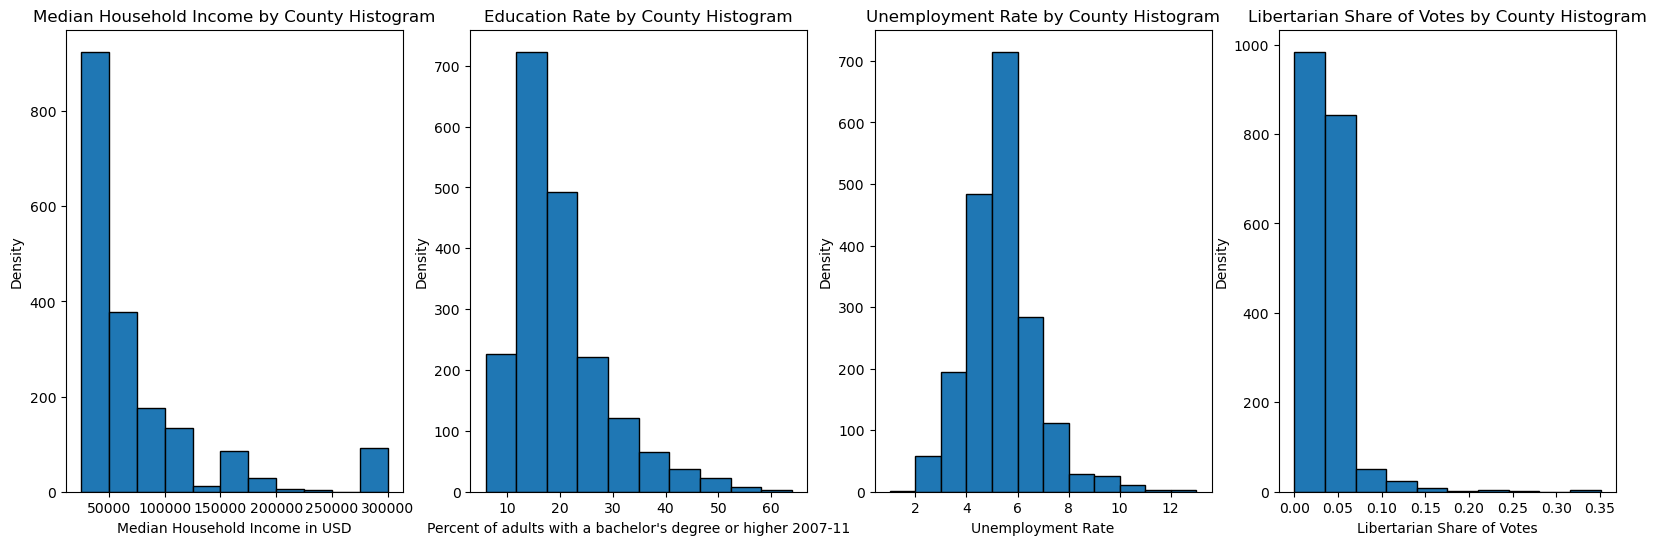

In [12]:
# NOW WE DO SOME VISUALIZATIONS
# HISTOGRAMS FOR THE DEPENDENT AND INDEPENDENT VARIABLES 
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
axs[0].hist(pres_df_merged['Median'], bins = [25000, 50000, 75000, 100000, 125000, 
                                           150000, 175000, 200000, 225000, 250000, 275000, 300000], ec = 'black')
axs[0].set_title('Median Household Income by County Histogram')
axs[0].set_xlabel('Median Household Income in USD')
axs[0].set_ylabel('Density')

axs[1].hist(pres_df_merged["Percent of adults with a bachelor's degree or higher 2007-11"], ec = 'black')
axs[1].set_title('Education Rate by County Histogram')
axs[1].set_xlabel("Percent of adults with a bachelor's degree or higher 2007-11")
axs[1].set_ylabel('Density')

axs[2].hist(pres_df_merged['Rate'], bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ec = 'black')
axs[2].set_title('Unemployment Rate by County Histogram')
axs[2].set_xlabel('Unemployment Rate')
axs[2].set_ylabel('Density')

axs[3].hist(pres_df_merged['vote_share_lib'], ec = 'black')
axs[3].set_title('Libertarian Share of Votes by County Histogram')
axs[3].set_xlabel('Libertarian Share of Votes')
axs[3].set_ylabel('Density')

# Changes Continued

Though there appears to be good variation amongst the results for median household income and unemployment rate, we do not seem to see the same in the variable 'deaths caused by guns by county'. It seems that such deaths are fairly rare in most counties, and in the few cases where there are more, it is usually an outlier, thus this is probably not a good explanatory variable.

Instead, we will add in more 'material' conditions, in this case I believe that education level could potentially be an impactful explanatory variable. The idea behind education level being an explanatory variable is that I expect those with higher levels of education having more critical thinking skills, and thus may be less likely to support the two mainstream political parties.

We will be looking at the most recent set of years before the 2016 election (2007-2011) for the education levels (% of county population that has acquired a bachelors degree or higher). Additionally, if that variables proves to have little variation, we can lower the bar and look at the acquisation of at least a high school diploma.

# B) Scatterplots with Lines of Best Fit 

We create scatterplots of the dependent variable on the independent variable (y axis for the share of votes for the Libertarian party, x axis for median household income, gun deaths, and unemployment rate by county).

For the scatterplot and the line of best fit of share of votes for the Libertarian party and the median household income by county, we cannot see any discernible trend. It seems that differing material conditions does not seem to have a significant impact on whether or not a county has larger share of votes for the Libertarian party.

Lastly, for the scatter plot of share of votes for the Libertarian party and the unemployment rate by county, we find that like the median household income by county, there does not seem to be any significant trend. From our past results, it seems that material conditions do not seem to have an effect on the share of votes for the Libertarian party in the counties that they are active in.

# Changes Made:

Although I was satisfied with the previous iteration of the scatter plots and the lines ofd best fit, I noticed that it was quite challenging to observe the individual points in the scatter plots since they were clustered quite closely to one another. Similarily to the suggestions made to improve my histogram (include edge colors), I decided to implement edge colors into the scatter plot as well, to make the data points more readable.

In addition to my original sub-plots, that were made specifically to save space, I think that it would be beneficial to have larger versions of each of the scatter plots, as I found out in the case of the scatter plot for my new predictor variable (education rate) being far more readable than any of my previous scatter plots. This is in part due to the fact that most observations around material conditions are fairly close to one another (not too large of a range for most observations), thus making it harder to read when the graph is smaller.

Lastly, I have opted to remove the scatterplot of the vote shares on deaths caused by shootings, as the data has very little variation ~ not enough data on more 'high crime' counties to infer effect of gun violence on voting outcomes for independent parties.

# Interpretation of Scatter Plot of Independent Voting Outcome on Education Rate

We measure education rate as the percentage of the adult population in the county who had a bachelor's degree or higher during the years of 2007-2011 (the set of years closest to the 2016 elections). From the scatter plot and corresponding line of best fit, we see that there is an upwards trend ~ more educated counties (higher rate of those with a bachelor's degree or more) tend to have more support for indepedent parties. This could be interpreted as those with more education tend to have more critical thinking abilities, and thus might develop a distaste for mainstream politics, thus confirming our earlier hypothesis.

Text(0, 0.5, 'Share of Votes for Libertarian Party')

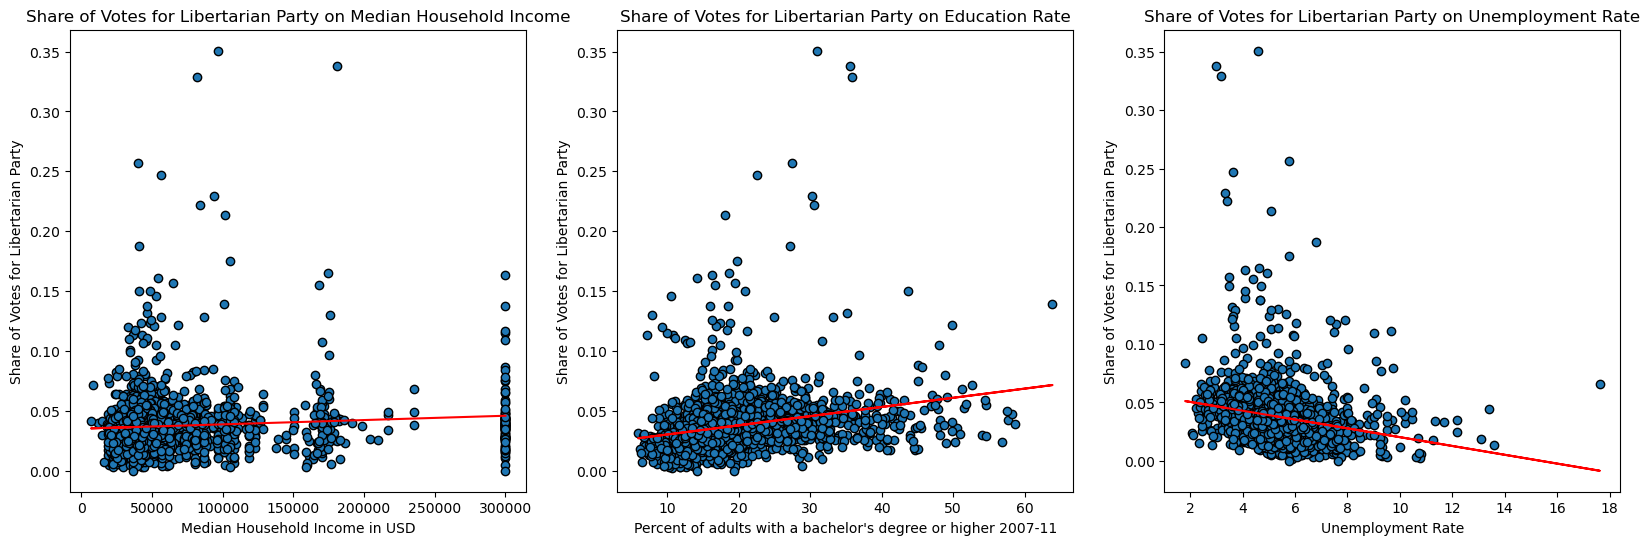

In [14]:
# Linear Graphs, (scatterplot + lines of best fit)
# For median household income:
medhhinc, beta1 = np.polyfit(pres_df_merged['Median'], pres_df_merged['vote_share_lib'], 1)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Scatterplot
axs[0].scatter(pres_df_merged['Median'], pres_df_merged['vote_share_lib'], edgecolors = 'black')
# Line of best fit 
axs[0].plot(pres_df_merged['Median'], pres_df_merged['Median']*medhhinc + beta1, color = 'red')
axs[0].set_title('Share of Votes for Libertarian Party on Median Household Income')
axs[0].set_xlabel('Median Household Income in USD')
axs[0].set_ylabel('Share of Votes for Libertarian Party')


# For Deaths caused by guns
edu, beta2 = np.polyfit(pres_df_merged["Percent of adults with a bachelor's degree or higher 2007-11"], pres_df_merged['vote_share_lib'], 1)
# Scatterplot
axs[1].scatter(pres_df_merged["Percent of adults with a bachelor's degree or higher 2007-11"], pres_df_merged['vote_share_lib'], edgecolors = 'black')
# Line of best fit 
axs[1].plot(pres_df_merged["Percent of adults with a bachelor's degree or higher 2007-11"], pres_df_merged["Percent of adults with a bachelor's degree or higher 2007-11"]*edu + beta2, color = 'red')
axs[1].set_title('Share of Votes for Libertarian Party on Education Rate')
axs[1].set_xlabel("Percent of adults with a bachelor's degree or higher 2007-11")
axs[1].set_ylabel('Share of Votes for Libertarian Party')


# For Deaths caused by guns
rate, beta3 = np.polyfit(pres_df_merged['Rate'], pres_df_merged['vote_share_lib'], 1)
# Scatterplot
axs[2].scatter(pres_df_merged['Rate'], pres_df_merged['vote_share_lib'], edgecolors = 'black')
# Line of best fit 
axs[2].plot(pres_df_merged['Rate'], pres_df_merged['Rate']*rate + beta3, color = 'red')
axs[2].set_title('Share of Votes for Libertarian Party on Unemployment Rate')
axs[2].set_xlabel('Unemployment Rate')
axs[2].set_ylabel('Share of Votes for Libertarian Party')


# 6. Citations
The following data sources were used:

Eltom, A. (2022, November 21). US gun deaths by county 1999-2019. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/ahmedeltom/us-gun-deaths-by-county-19992019 

Golden Oak Research Group. (2018, April 16). US household income statistics. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations 

Tunguz, B. (2021, January 25). US elections dataset. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/tunguz/us-elections-dataset?select=usa-2016-presidential-election-by-county.csv 

Weber, N. (2019, March 20). Analysis of World crime. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/code/zikazika/analysis-of-world-crime/data 


# Part 2: Project 2: Do Dissatisfied Voters Vote for Independent Political Parties more Frequently?

# The Message

Previously, in project 1 I was looking at how material conditions within counties may affect the voting preferences of those living in the county, and it would increase the share of votes for the Libertarian party. The initial idea was to measure if dissatisfaction with material conditions made voters more likely to vote for a party that was not with the 'establishment'. Thus I used the most popular third party option. However, it seems that the Libertarian party is far too minor in the political landscape of the US in spite of being the most popular third-party option. Since I am still interested in the outcomes of non-mainstream political parties, I instead chose to group the Libertarian party votes with that of other independent candidates. Despite having very varied positions, I believe that their views are different enough from the two major parties such that people voting for the third-party options do so as a form of protest.

From some feedback on the first stage of the project, I will be ignoring the 'deaths caused by shootings by county', as there is too little variation. Thus, instead of looking at the cultural trends having an impact on the election outcomes by county, I will instead focus solely on the material conditions on the election outcomes. My hypothesis for the material conditions is that they should have more of an impact than cultural factors, as people tend to be more upset when their expectations for material conditions are not met.

# New Graphs

We wish to look at the relationship between our outcome variable (share of votes belonging to independent parties by county) and the predictor variables of education rate and unemployment rate, but now with the inclusion of high income county versus low income county.

To do this, we will create a new indicator variable based off of median household income by county. This indicator will be based off of the 75th percentile of household earnings in 2015 ~ thus we will set the status to equal 1 if the median household income of the county is equal to or exceeds 100000 USD, and 0 otherwise.

In [ ]:
# Add in new hh median income indicator variable:
pres_df_merged['high_income_status'] = np.where(pres_df_merged['Median'] >= 100000, 1, 0)
pres_df_merged.head()

In [ ]:
# We now want to make the scatterplots, but with the addition of classifying observations by high and low income:
# Create single_df function
def single_scatter_plot_edu(df, high_income_status, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(high_income_status == @high_income_status)")
    _df.plot(
        kind="scatter", x="Percent of adults with a bachelor's degree or higher 2007-11", y="vote_share_lib", ax=ax, color=color,
        ec = 'black', alpha=0.5
    )

    return ax

fig, ax = plt.subplots(figsize=(16, 12))

# For education rate:

single_scatter_plot_edu(pres_df_merged, 1, ax, "b")
single_scatter_plot_edu(pres_df_merged, 0, ax, "r")

In [ ]:
# For the purpose of clarity, I intend to look at them in separate scatter plots as well, and add in corresponding 
# lines of best fit:


In [ ]:
# We now take a look at unemployment rate:
# We now want to make the scatterplots, but with the addition of classifying observations by high and low income:
# Create single_df function
def single_scatter_plot_une(df, high_income_status, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(high_income_status == @high_income_status)")
    _df.plot(
        kind="scatter", x="Rate", y="vote_share_lib", ax=ax, color=color,
        ec = 'black', alpha=0.5
    )

    return ax

fig, ax = plt.subplots(figsize=(16, 12))

# For education rate:

single_scatter_plot_une(pres_df_merged, 1, ax, "b")
single_scatter_plot_une(pres_df_merged, 0, ax, "r")

In [ ]:
# For the purpose of clarity, I intend to look at them in separate scatter plots as well, and add in corresponding 
# lines of best fit:
# create function to acquire queried df:
def df_query(df, status):
    df_queried = pres_df_merged.query("(high_income_status == @status)")
    return df_queried
# Set up subplot:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# For high income:
edu1, beta5 = np.polyfit(df_query(pres_df_merged, 1)["Percent of adults with a bachelor's degree or higher 2007-11"], df_query(pres_df_merged, 1)['vote_share_lib'], 1)

# Scatterplot with line of best fit 
axs[0].scatter(df_query(pres_df_merged, 1)["Percent of adults with a bachelor's degree or higher 2007-11"], df_query(pres_df_merged, 1)['vote_share_lib'], 
               color = 'b', edgecolors = 'black', alpha = 0.5)

axs[0].plot(df_query(pres_df_merged, 1)["Percent of adults with a bachelor's degree or higher 2007-11"], df_query(pres_df_merged, 1)["Percent of adults with a bachelor's degree or higher 2007-11"]*edu1 + beta5, color = 'red')

axs[0].set_title('Share of Votes for Libertarian Party on Education Rate (High Income)')
axs[0].set_xlabel("Percent of adults with a bachelor's degree or higher 2007-11")
axs[0].set_ylabel('Share of Votes for Libertarian Party')
# For low income:
edu2, beta6 = np.polyfit(df_query(pres_df_merged, 0)["Percent of adults with a bachelor's degree or higher 2007-11"], df_query(pres_df_merged, 0)['vote_share_lib'], 1)
# Scatterplot with line of best fit 
axs[1].scatter(df_query(pres_df_merged, 0)["Percent of adults with a bachelor's degree or higher 2007-11"], df_query(pres_df_merged, 0)['vote_share_lib'], 
               color = 'r', edgecolors = 'black', alpha = 0.5)

axs[1].plot(df_query(pres_df_merged, 0)["Percent of adults with a bachelor's degree or higher 2007-11"], df_query(pres_df_merged, 0)["Percent of adults with a bachelor's degree or higher 2007-11"]*edu2 + beta6, color = 'blue')

axs[1].set_title('Share of Votes for Libertarian Party on Education Rate (Low Income)')
axs[1].set_xlabel("Percent of adults with a bachelor's degree or higher 2007-11")
axs[1].set_ylabel('Share of Votes for Libertarian Party')

In [ ]:
# We now do so for the unemployment rate now:
# Set up subplot:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# For high income:
rate1, beta7 = np.polyfit(df_query(pres_df_merged, 1)["Rate"], df_query(pres_df_merged, 1)['vote_share_lib'], 1)

# Scatterplot with line of best fit 
axs[0].scatter(df_query(pres_df_merged, 1)["Rate"], df_query(pres_df_merged, 1)['vote_share_lib'], 
               color = 'b', edgecolors = 'black', alpha = 0.5)

axs[0].plot(df_query(pres_df_merged, 1)["Rate"], df_query(pres_df_merged, 1)["Rate"]*rate1 + beta7, color = 'red')

axs[0].set_title('Share of Votes for Libertarian Party on Unemployment Rate (High Income)')
axs[0].set_xlabel("Unemployment Rate")
axs[0].set_ylabel('Share of Votes for Libertarian Party')
# For low income:
rate2, beta8 = np.polyfit(df_query(pres_df_merged, 0)["Rate"], df_query(pres_df_merged, 0)['vote_share_lib'], 1)
# Scatterplot with line of best fit 
axs[1].scatter(df_query(pres_df_merged, 0)["Rate"], df_query(pres_df_merged, 0)['vote_share_lib'], 
               color = 'r', edgecolors = 'black', alpha = 0.5)

axs[1].plot(df_query(pres_df_merged, 0)["Rate"], df_query(pres_df_merged, 0)["Rate"]*rate2 + beta8, color = 'blue')

axs[1].set_title('Share of Votes for Libertarian Party on Unemployment Rate(Low Income)')
axs[1].set_xlabel("Unemployment Rate")
axs[1].set_ylabel('Share of Votes for Libertarian Party')

# Interpretation

When looking at the scatterplots of the vote share of independent parties on education and unemployment rate separately, with the inclusion of the subgroups of high income/low income counties (high income counties being counties that have a median household income of 100000 USD or higher(75th percentile of household income in 2015), and low income counties having a median household income lower than 100000 USD), we see that there is no significant difference amongst the unemployment and education rate between high-income and low-income counties.

We state this due to seeing a large amount of overlap in these graphs, in contrast to a graph where the subgroups are distinct, which would result in less overlap. This distinction found in other subgroup plots could either be attributed to subgroups being predisposed to different outcomes or having different levels for their characteristics. In our case, it appears as though high-income counties and low-income counties do not have different characteristics as most of the observations seem to have the education rate range from 10 to 30%, and unemployment rate in a range of 2 to 8%. However, given that there are far more 'low-income' counties, the outliers outside of the ranges mentioned do have more observations, but there are relatively few.

In terms of the outcome variable, share of independent votes by county, we see that there is significant overlap, with very few outliers from both sides. This indicates that there should be no significant difference between the voting outcomes in counties that are high or low income, given that the other material conditions (education or unemployment rate) are the same. This is in contrast to when we created a line of best fit for the voting outcome on median household income by county, where there was a slight positive trend. However, until we see the full model with all of the predictors included, we cannot fully rule out if median household income by county is not statistically significant.

At the very least from our scatter plots, we can tell that there shouldn't be any significant collinearity between median household income by county, and the corresponding education and unemployment rates. This was originally a concern as we had prior beliefs that wealthier counties had less unemployment and a more educated populace.

We also added in separate scatter plots for the subgroups to make interpretation easier for us. While we were able to tell that there existed a significant overlap, we wanted to be able to observe that it was the case, as it was challenging for us to determine even though we added in transparency and edge colors to the original scatter plots.

# Maps of the United States by Counties where Independent Parties are Active

In this section, I create maps of the United States, with the state borders and county borders (of those where Libertarians and other Independent parties are active in) for both the outcome variable (vote share of independent groups) and the explanatory variables (education levels, household median income, and unemployment rate).

Putting the visualizations onto the map will help us see which geographic regions seem to be experiencing poor/good material conditions, and thus provide us with a more intuitive understanding of the trends in vote shares of the 'indpendent party' group.

In [ ]:
import geopandas as gpd
# We want to plot both state and county lines...
# Probably ignore the faraway states
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
# Create a list of states that we are excluding from the map ~ otherwise the map will appear much smaller and harder to read
# We've managed to remove most of 
not_allow = ['02', '60', '66', '69', '72', '78', '15']
# Try plotting out them states I tell you hwat 
fig, gax = plt.subplots(figsize = (30,24))
# State df remove those far away:
state_df = state_df.query('STATEFP not in @not_allow')
state_df.plot(ax = gax, edgecolor='black',color='white')
# Set up dataframe to contain results and geo data:
county_list = []
for item in county_df['NAME']:
    county_list.append(item + ' County')
county_df['county_name'] = county_list
geo_df = state_df.merge(county_df, how = 'left', left_on = ['STATEFP'], right_on = ['STATEFP'])
geo_df_results = geo_df.merge(pres_df_merged, how = 'left', left_on = ['NAME_x', 'county_name']
                              , right_on = ['State', 'Area name'])
geo_df_results.dropna(inplace = True)
# Convert back to geodataframe
geo_df_results = gpd.GeoDataFrame(geo_df_results, geometry="geometry_y")
geo_df_results = geo_df_results[['county_name', 'geometry_y', 'Rate', 'Median'
                                 , "Percent of adults with a bachelor's degree or higher 2007-11", 'vote_share_lib']]

# Now we plot the counties and results:
# This map is for the outcome variable (share of votes for independents + libertarians)
geo_df_results.plot(
    ax=gax, edgecolor='black', column='vote_share_lib', legend=True, cmap='RdBu_r',
    vmin=0.0, vmax=0.2 #range of your column value for the color legend
)
gax.set_title('Vote share of Independent Parties by County')
plt.axis('off')
plt.show()

In [ ]:
# For median household income 
fig, gax = plt.subplots(figsize = (30,24))
state_df.plot(ax = gax, edgecolor='black',color='white')
geo_df_results.plot(
    ax=gax, edgecolor='black', column='Median', legend=True, cmap='RdBu_r',
    vmin=5000, vmax=250000 #range of your column value for the color legend
)
gax.set_title('Median Household Income by County')
plt.axis('off')
plt.show()

In [ ]:
# For unemployment rate
fig, gax = plt.subplots(figsize = (30,24))
state_df.plot(ax = gax, edgecolor='black',color='white')
geo_df_results.plot(
    ax=gax, edgecolor='black', column='Rate', legend=True, cmap='RdBu_r',
    vmin=1, vmax=15 #range of your column value for the color legend
)
gax.set_title('Unemployment Rate by County')
plt.axis('off')
plt.show()

In [ ]:
# For education rate...
fig, gax = plt.subplots(figsize = (30,24))
state_df.plot(ax = gax, edgecolor='black',color='white')
geo_df_results.plot(
    ax=gax, edgecolor='black', column="Percent of adults with a bachelor's degree or higher 2007-11", legend=True, cmap='RdBu_r',
    vmin=5, vmax=40 #range of your column value for the color legend
)
gax.set_title("Percent of Adults with a Bachelor's Degree or Higher by County")
plt.axis('off')
plt.show()

# Map Explanations

_Standout States: Noticeable Independent Party Vote Shares_

In most of the counties in different states in the US, we see that independent parties tend to have little to no (0 to 5% of votes in a county) presence. However, in certain states these independent parties have a much more significant impact (10 to 45% of votes in a county) where they are able to either change the outcome for the major political parties, or win the vote in the county themselves.

These states are Utah, New Mexico and Idaho, which stood out given their outcome ~ where they had 10 to 45% of the votes in the county. Apart from that, it seems that the west coast generally have a higher percentage of votes for independent parties in their counties (generally 5 to 10% of the votes). Whereas in the east coast and the south we see that the share of votes tends towards the 0 to 4% range.

Utah, from research, seems to have had a particular high percentage of the votes belong to an independent party within most of their counties since a former Republican candidate, Evan McMullin, decided to split off and run as an independent candidate with more of a focus on his religious background as a Mormon. Given that the religious demographic of Utah (66% of the populace in Utah being Mormons) heavily favors Mormons, it is less due to the material conditions in this case, but seems to be more focused on the cultural aspect resulting in the success of this independent political group. In the future, if we have the chance to incorporate any cultural measures such as religion. 

In the cases of New Mexico, we see that Libertarians (in total, across all counties) managed to acquire 24 percent of all the votes, thus while not significant enough to secure a victory within the state, has shown that their success could be attributed more towards their ideology instead of the material conditions ~ seeing as they are most successful in the counties where the median household income was on the higher end of the spectrum.

For Idaho, the most popular independent party was headed by Evan McMullin, who managed to garner some support from the Mormon populace. However, Trump still won in most of the counties within Idaho.

_Additional Observations:_

In the other parts of the country, in particular the east coast and the south, we see that there is very little support for independent political parties relative to the west coast, alongside the standout states (Idaho, Utah, and New Mexico). In part, the east coast is known to heavily favor the Democrats, and the south to favor the Republicans.

Additionally, in terms of higher education, it appears as though the east coast has a particular noteable portion of the population having completed at least a bachelors degree. In those areas, we see that there is relatively low support for independent parties. While we may draw the conclusion that a more educated populace may not be supportive of smaller political parties, we observe that along the east coast in similarily highly educated counties, that there is more support for these independent parties. Thus, it could have more to do with the cultural allegiance to the Democrats party instead of the material conditions being of higher quality.


# 5. Conclusion

From our research on the independent parties aggregated performance in the 2016 Presidential Election, we see that in the counties they were active in, they did not seem to perform particularly well, with most of their share of votes being in the 0 to 10% range, which is not much different than when we were observing just the Libertarian party. In fact, by including all independent parties (aggregating the vote shares), we see that the average vote share across all counties actually decreases. TAs explained earlier, this could be caused by the inclusion of more observations, since in counties where the Libertarian party is not active in the less popular independent parties may attract less attention which brings in observations with lower vote share. Additionally, while we were expecting material conditions to have a negative impact on the aggregate independent parties' share of votes across counties, we actually observed the opposite effect, instead noticing an increase when any of our three material outcomes measure increases (median income, unemployment rate (decrease), and education rate). This is particularly interesting, as we were expecting dissatisfaction to cause counties to be more supportive of third-party candidates (thus as material conditions improve, support for third-party candidates to decrease). However, with these new findings, we can instead interpret this support as people being more capable of putting more effort into their 'passions' (political in nature) once their base needs are satisfied (some threshold of material wealth and so on), and look into putting more support into these niche political parties, instead of siding with one of the mainstream parties.

Moving forward, I think it is quite important for us to focus on the materialistic approach and see if our new hypothesis about improving material conditions results in more support for independent parties. Thus to prove this, we want to see if improvements in other material conditions results in a similar positive trend with the voting outcomes. Some other material conditions worth considering in the future could inclue food security, crime rates, and physical health (which are all tied to the base needs, as opposed to the previous measures that seem to be higher on the hierarchy of needs).

Eventually, once we have covered the materialistic needs, we should try to revisit the cultural influences behind voting outcomes. Though it is far more challenging to do so, as we cannot have any concrete measures and interpretations of cultural influence, which can potentially be implemented with the usage of textual analysis.

# 6. Citations
The following data sources were used:

Eltom, A. (2022, November 21). US gun deaths by county 1999-2019. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/ahmedeltom/us-gun-deaths-by-county-19992019 

Golden Oak Research Group. (2018, April 16). US household income statistics. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations 

Tunguz, B. (2021, January 25). US elections dataset. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/datasets/tunguz/us-elections-dataset?select=usa-2016-presidential-election-by-county.csv 

Weber, N. (2019, March 20). Analysis of World crime. Kaggle. Retrieved February 2, 2023, from https://www.kaggle.com/code/zikazika/analysis-of-world-crime/data 
